**Лабораторная работа 1**

**Градиентный спуск c постоянным шагом**

In [ ]:
from scipy.optimize.linesearch import scalar_search_wolfe2
from scipy.sparse import diags
import numpy as np
import scipy as scipy
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from abc import ABCMeta, abstractmethod
import dataclasses
import itertools
from typing import Callable
import pandas as pd
import math
pd.set_option("precision", 10)

In [ ]:
class QuadraticOracle:
    """
    Oracle for quadratic function:
       func(x) = 1/2 · x^T · A · x - b^T · x.
       ~= 1/2 * x^2 * a - b * x ~= 
    """

    def __init__(self, A, b):
        if not np.allclose(A, A.T, rtol=1e-05, atol=1e-08):
            raise ValueError('A should be a symmetric matrix.')
        self.A = A
        self.b = b

    def func(self, x):
        return 0.5 * np.dot(self.A.dot(x), x) - self.b.dot(x)

    def grad(self, x):
        return self.A.dot(x) - self.b

    def funcDirectional(self, x, d, alpha):
        return np.squeeze(self.func(x + alpha * d))

    def gradDirectional(self, x, d, alpha):
        return np.squeeze(self.grad(x + alpha * d).dot(d))

In [ ]:
def gradientDescentConstantStep(oracle: QuadraticOracle, x_0, step, tolerance=1e-5, max_iter=1000):
    x_k = x_0
    func_x_k = oracle.func(x_k)
    grad_x_k = oracle.grad(x_k)
    a_k = None
    trace = []
    funcRes = []
    grad_x_0_norm = np.linalg.norm(grad_x_k)

    funcRes.append(func_x_k)
    if x_0.size <= 2:
        trace.append(np.copy(x_k))

    for _ in range(max_iter):
        d_k = -grad_x_k
        a_k = step
        x_k += a_k * d_k
        func_x_k = oracle.func(x_k)
        grad_x_k = oracle.grad(x_k)
        grad_x_k_norm = np.linalg.norm(grad_x_k)

        funcRes.append(func_x_k)
        if x_0.size <= 2:
            trace.append(np.copy(x_k))

        if grad_x_k_norm ** 2 <= tolerance * grad_x_0_norm ** 2:
            return x_k, trace, funcRes

    return x_k, trace, funcRes

In [ ]:
oracle = QuadraticOracle(np.eye(5), np.arange(5))

for step in [0.01, 0.1, 0.3, 1/3, 4/7, 1.1, 2**(1/2), 1.5, 3**(1/2)]:
    print ('step ' + str(step))
    x_k, trace, funcRes = gradientDescentConstantStep(oracle, np.zeros(5), step)
    result = funcRes[-1]
    it = 0
    for i in range(1, len(funcRes)):
        if it == 30:
          print('...')
          break
        it += 1
        ratio = (funcRes[i] - result)
        print(ratio)
    print('____________________\n')

step 0.01
14.701350712217256
14.408790862217256
14.122052953232256
13.841021128636058
13.565581837349324
13.295623787959196
13.031037903751931
12.771717278640391
12.51755713396857
12.26845477617572
12.024309555302946
11.78502282432554
11.550497899294585
11.320640020271746
11.095356313041462
10.87455575158506
10.65814912130164
10.446048982960862
10.238169637373066
10.034427090762463
9.834739020829414
9.639024743488033
9.447205180265744
9.25920282635158
9.074941719280305
8.894347408239751
8.717346923988902
8.54386874937465
8.373842790435216
8.207200348078679
...
____________________

step 0.1
12.149861079193037
9.841361079193037
7.971476079193037
6.456869229193037
5.2300376806930355
4.236304126408035
3.4313799474371844
2.779391362470797
2.251280608648022
1.823510898051575
1.4770174324684522
1.196357725346127
0.9690233625770368
0.7848825287340784
0.635728453321283
0.5149136522369151
0.41705366335857796
0.3377870723671226
0.273581133664047
0.22157432331455418
0.17944880693146636
0.14532713

**Градиентный спуск с функцией шага**

In [ ]:
def gradientDescentStepFunction(oracle: QuadraticOracle, x_0, stepFunction, initRate, tolerance=1e-5, max_iter=1000):
    x_k = x_0
    func_x_k = oracle.func(x_k)
    grad_x_k = oracle.grad(x_k)
    a_k = None
    trace = []
    funcRes = []
    grad_x_0_norm = np.linalg.norm(grad_x_k)

    funcRes.append(func_x_k)
    if x_0.size <= 2:
        trace.append(np.copy(x_k))

    for it in range(max_iter):
        d_k = -grad_x_k
        a_k = stepFunction(initRate, it)
        x_k += a_k * d_k
        func_x_k = oracle.func(x_k)
        grad_x_k = oracle.grad(x_k)
        grad_x_k_norm = np.linalg.norm(grad_x_k)

        funcRes.append(func_x_k)
        if x_0.size <= 2:
            trace.append(np.copy(x_k))

        if grad_x_k_norm ** 2 <= tolerance * grad_x_0_norm ** 2:
            return x_k, trace, funcRes

    return x_k, trace, funcRes

In [ ]:
def expStep(initRate, it):
   k = 0.01
   lrate = initRate * np.exp(-k*it)
   return lrate

In [ ]:
oracle = QuadraticOracle(np.eye(5), np.arange(5))

for initRate in [0.1, 0.5, 0.7, 0.9, 1.1, 2, 3, 5]:
    print ('init rate = ' + str(initRate))
    x_k, trace, funcRes = gradientDescentStepFunction(oracle, np.zeros(5), expStep, initRate)
    result = funcRes[-1]
    it = 0
    for i in range(1, len(funcRes)):
        if it == 30:
          print('...')
          break
        it += 1
        ratio = (funcRes[i] - result)
        print(ratio)
    print('____________________\n')

init rate = 0.1
12.14986048703504
9.863133529831332
8.024305385379035
6.542419419287841
5.345610544835406
4.376973941431842
3.591353413032115
2.9528391908709146
2.4328142330766447
2.0084255108087667
1.6613852923402224
1.3770292137887417
1.143574588974161
0.9515351892557931
0.7932585439674611
0.6625593741193736
0.5544286075898892
0.4648019365478788
0.39037537440553116
0.32845798440710716
0.2768540640061694
0.23376871554920342
0.19773201965660192
0.1675380339518231
0.14219562874792402
0.12088879105704464
0.10294451604465849
0.0878067896342749
0.07501546976091333
0.06418911418243489
...
____________________

init rate = 0.5
3.7498868711243176
0.9561362507900206
0.24851045378597902
0.06577102654799383
0.01767491101931995
0.004778225089630439
0.0012562818526511421
0.00027707887621808425
0.0
____________________

init rate = 0.7
1.3498618231896522
0.1270690597961437
0.012392840479247269
0.0011505239659435063
0.0
____________________

init rate = 0.9
0.14997528084497347
0.001755964539469801
0

3 задание

**Метод дихотомии**

зададим интервал, убедимся, что на концах функция имеет разный знак,
выберем точку x внутри интервала, сравним знак x со знаком в одном из концов, если совпадает, то переместим этот конец интервала в точку x, иначе переместим в другой конец интервала, пока не будет достигнута нужная точность



In [ ]:
def dichotomy(oracle, l, r, eps):
    delta = eps / 3
    m = (l + r) / 2
    count = 0

    while abs(l - r) >= eps:
        m = (l + r) / 2
        x1 = m - delta
        x2 = m + delta

        y1 = oracle.func(x1)
        y2 = oracle.func(x2)

        count = count + 2

        if y1 < y2:
            r = x2
        else:
            l = x1

    return m, count

In [ ]:
class OneDimensionalOracle:
    def __init__(self, func, grad, min_value):
        self.func = func
        self.grad = grad
        self.min_value = min_value

In [ ]:
def step(oracle, x0, d_k, method, c, dichotomy_first_step = 0.01, dichotomy_eps=0.01):
    if method == 'Constant':
        return x0 + c*d_k, c, 1, 1
    elif method == 'Division':
        return x0 + c * d_k, c / 2, 1, 1
    elif method == 'Dichotomy':
        step = dichotomy_first_step
        x2 = x0 + dichotomy_first_step*d_k
        new_grad_cnt = 1
        while oracle.grad(x2) <= 0:
           step *= 2
           if step >= 10:
              return x2, c
           new_grad_cnt = new_grad_cnt + 1
            
           x2 = x0 + step*d_k

        x, cnt = dichotomy(oracle, x0, x2, dichotomy_eps)

        return x, c, cnt, new_grad_cnt

In [ ]:
def gradientDescent(oracle, x_0, method, c0, tolerance=1e-5, max_iter=10000):
    cnts_func = 0
    cnts_grad = 0
    x_k = x_0
    func_x_k = oracle.func(x_k)
    grad_x_k = oracle.grad(x_k)
    a_k = None
    trace = []
    funcRes = []
    grad_x_0_norm = np.linalg.norm(grad_x_k)

    funcRes.append(func_x_k)
    trace.append(x_k)

    c = c0

    for _ in range(max_iter):
        d_k = -grad_x_k
        x_k, c, new_cnt, new_grad_cnt = step(oracle, x_k, d_k, method, c)
        cnts_func = cnts_func + new_cnt
        cnts_grad = cnts_grad + new_grad_cnt
        func_x_k = oracle.func(x_k)
        grad_x_k = oracle.grad(x_k)
        grad_x_k_norm = np.linalg.norm(grad_x_k)

        funcRes.append(func_x_k)
        trace.append(x_k)

        if grad_x_k_norm ** 2 <= tolerance * grad_x_0_norm ** 2:
            return x_k, trace, funcRes, cnts_func, cnts_grad

    return x_k, trace, funcRes, cnts_func, cnts_grad

In [ ]:
oracle = OneDimensionalOracle(
            func = lambda x: x * x + 5,
            grad = lambda x: 2*x,
            min_value = 5
        )
methods = ['Constant', 'Division', 'Dichotomy']

for method in methods:
    x_k, trace, funcRes, cnts_func, cnt_grad = gradientDescent(oracle, 10, method, 0.001)
    result = funcRes[-1]
    print(method)
    print("Func min value: ", oracle.min_value)
    print("Find min value: ", result)
    print("Num steps: ", len(trace))
    print("Func calculation count: ", cnts_func)
    print("Grad calculation count: ", cnt_grad)

Constant
Func min value:  5
Find min value:  5.000997409464502
Num steps:  2877
Func calculation count:  2876
Grad calculation count:  2876
Division
Func min value:  5
Find min value:  104.20266179591735
Num steps:  10001
Func calculation count:  10000
Grad calculation count:  10000
Dichotomy
Func min value:  5
Find min value:  5.000981941857355
Num steps:  1483
Func calculation count:  7500
Grad calculation count:  1482


In [ ]:
oracle = OneDimensionalOracle(
            func = lambda x: math.sin(x),
            grad = lambda x: math.cos(x),
            min_value = -1
        )

methods = ['Constant', 'Division', 'Dichotomy']

for method in methods:
    x_k, trace, funcRes, cnts_func, cnt_grad = gradientDescent(oracle, 10, method, 0.01)
    result = funcRes[-1]
    print(method)
    print("Func min value: ", oracle.min_value)
    print("Find min value: ", result)
    print("Num steps: ", len(trace))
    print("Func calculation count: ", cnts_func)
    print("Grad calculation count: ", cnt_grad)

Constant
Func min value:  -1
Find min value:  -0.9999965052190015
Num steps:  600
Func calculation count:  599
Grad calculation count:  599
Division
Func min value:  -1
Find min value:  -0.5579737783572841
Num steps:  10001
Func calculation count:  10000
Grad calculation count:  10000
Dichotomy
Func min value:  -1
Find min value:  -0.9999979427785897
Num steps:  2
Func calculation count:  18
Grad calculation count:  8


In [ ]:
COLOR_RED = np.linspace(240, 166, 256) / 255.
COLOR_GREEN = np.linspace(244, 188, 256) / 255.
COLOR_BLUE = np.linspace(246, 203, 256) / 255.

In [ ]:
def plotLevels(func):
    xrange = [-6, 6]
    yrange = [-5, 5]
    levels = [0, 0.25, 1, 4, 9, 16, 25]

    x = np.linspace(xrange[0], xrange[1], 100)
    y = np.linspace(yrange[0], yrange[1], 100)
    X, Y = np.meshgrid(x, y)
    Z = np.zeros(X.shape)
    for i in range(Z.shape[0]):
        for j in range(Z.shape[1]):
            Z[i, j] = func(np.array([X[i, j], Y[i, j]]))

    colors = np.vstack([COLOR_RED, COLOR_GREEN, COLOR_BLUE]).T
    my_cmap = ListedColormap(colors)

    _ = plt.contourf(X, Y, Z, levels=levels, cmap=my_cmap)
    CS = plt.contour(X, Y, Z, levels=levels, colors='#ABBECC')
    plt.clabel(CS, inline=1, fontsize=8, colors='#AAAEBB')
    plt.grid()

In [ ]:
def plotTrace(trace):
    x_values, y_values = zip(*trace)
    plt.plot(x_values, y_values, '-o', linewidth=1.0, ms=5.0,
             alpha=1.0, c='C2', label="Trajectory")

In [ ]:
class StepCalculator:
    __metaclass__ = ABCMeta

    @abstractmethod
    def get_step_size(self, x_k: float, d_k: float): raise NotImplementedError


class Constant(StepCalculator):
    value: float

    def __init__(self, value: float):
        self.value = value

    def get_step_size(self, x_k: float, d_k: float):
        return self.value


class Division(StepCalculator):
    alpha_0: float

    def __init__(self, alpha_0: float):
        self.alpha_0 = alpha_0

    def get_step_size(self, x_k: float, d_k: float):
        return self.alpha_0 / 2


In [ ]:
def lineSearch(oracle, x_k, d_k, method, c, c1, c2, alpha_0, previous_alpha=None):
    if method == 'Constant':
        return c
    elif method == 'Division':
        return c / 2
    elif method == 'Armijo':
        alpha = alpha_0 if previous_alpha is None else previous_alpha
        while (oracle.funcDirectional(x_k, d_k, alpha) > oracle.func(
                x_k) + c1 * alpha * oracle.gradDirectional(x_k, d_k, 0)):
            alpha /= 2
        return alpha

In [ ]:
def gradientDescent(oracle: QuadraticOracle, x_0, method, c0, c1, alpha, tolerance=1e-5, max_iter=1000):
    x_k = x_0
    func_x_k = oracle.func(x_k)
    grad_x_k = oracle.grad(x_k)
    a_k = None
    trace = []
    funcRes = []
    grad_x_0_norm = np.linalg.norm(grad_x_k)

    funcRes.append(func_x_k)
    if x_0.size <= 2:
        trace.append(np.copy(x_k))

    for _ in range(max_iter):
        d_k = -grad_x_k
        a_k = lineSearch(oracle, x_k, d_k, method, 0.5, c0, c1, alpha, 2 * a_k if a_k else None)
        if method == 'Division':
          a_k /= 2
        x_k += a_k * d_k
        func_x_k = oracle.func(x_k)
        grad_x_k = oracle.grad(x_k)
        grad_x_k_norm = np.linalg.norm(grad_x_k)

        funcRes.append(func_x_k)
        if x_0.size <= 2:
            trace.append(np.copy(x_k))

        if grad_x_k_norm ** 2 <= tolerance * grad_x_0_norm ** 2:
            return x_k, trace, funcRes

    return x_k, trace, funcRes

Задание 5.

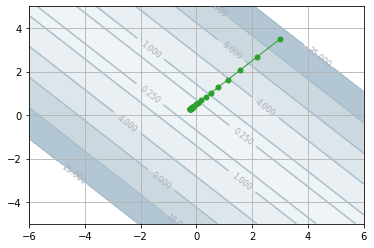

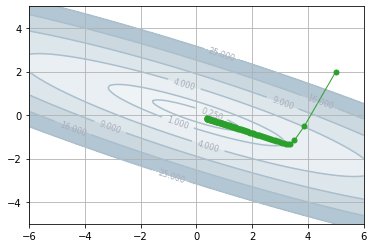

In [ ]:
def exec(oracle, x_0): 
  grd, trace, funcs = gradientDescent(oracle, x_0, 'Division', 0.1, 0.1, 0.2)
  plotLevels(oracle.func)
  plotTrace(trace)
  plt.show()
  
exec(QuadraticOracle(np.array([[1.0, 1.0], [1.0, 1.0]]), np.zeros(2)), np.array([3.0, 3.5]))
exec(QuadraticOracle(np.array([[1.0, 2.0], [2.0, 5.0]]), np.zeros(2)), np.array([5.0, 2.0]))

Задание 6.


In [ ]:
def buildDeps():
    # размерности
    dims = [10, 100, 1000]
    colors = ['r', 'g', 'b']
    # числа обусловенности
    kappas = list(range(1, 1000, 100))
    # число сэмплов
    number_of_samples = 3
    T = {}
    for n, color in zip(dims, colors):
        T[n] = [[] for _ in range(number_of_samples)]
        for i in range(number_of_samples):
            for kappa in kappas:
                np.random.seed(1000 + i)
                diag = np.random.uniform(low=1, high=kappa, size=n)
                diag[0], diag[-1] = 1, kappa
                A = diags(diag).toarray()
                b = np.random.uniform(low=1, high=kappa, size=n)
                _, _, funcs = gradientDescent(QuadraticOracle(A, b), np.zeros(n), 'Division', 0.1, 0.1, 0.2)
                T[n][i].append(len(funcs))
            plt.plot(kappas, T[n][i], color=color, alpha=0.3, linestyle = '-.')
        plt.plot(kappas, np.mean(T[n], axis=0), color=color, label='n = {}'.format(n))
    plt.legend()
    plt.grid()
    plt.ylabel('Количество итераций $N(n, \kappa)$')
    plt.xlabel('Число обусловленности целевой функции $\kappa$')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in add
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in add
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


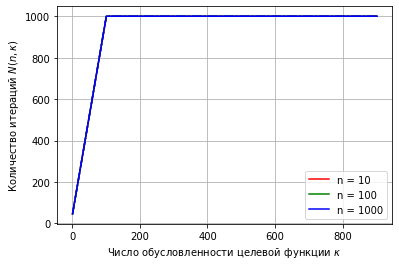

In [ ]:
buildDeps()
plt.show()